In [1]:
#Collatz conjecture (https://en.wikipedia.org/wiki/Collatz_conjecture) is a famous outstanding problem in mathematics. 
#The problem is very simple to state : start with any integer n. If n is even take it to n/2 and if n is odd take it 
#to 3n+1. The conjecture states that for any positive integer n, the process will converge to 1 in a finite number
#of times. 

#In this code we will try to analyze different aspects of the conjecture. The questions that we will try to address is
#1. For a given number n how is the trajectory of the process.
#2. If we consider intergers upto N then how are the frequency of numbers that the process goes through. 

In [16]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import imageio
import os
import matplotlib as mpl

In [2]:
def collatz(n): #This function returns a list of numbers that the collatz algorithm runs through
    x0=[] #initialising list for the trajectory
    x0.append(n)
    if n<1:
        print("Please enter an input greater than or equal to 1")
    else:
        if n==1:
            x0.append(1)
        while n>1:
            if n%2==0:
                n=int(n/2)
                x0.append(n)
            else:
                n=3*n+1
                x0.append(n)
    return x0


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


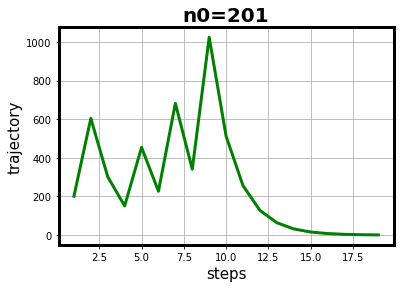

In [10]:
#This shows the collatz trajectory for a number n0
n0=201
xs=[]
xs.append(0)
xs=[i1+1 for i1 in range(len(collatz(n0)))] #length of xs is the number steps required to reach 1
print(xs)
plt.plot(xs,collatz(n0),color='green',linewidth=3)
plt.xlabel("steps")
plt.title("n0="+str(n0),fontsize=20, fontweight='bold')
plt.ylabel("trajectory",fontsize=15)
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.xlabel("steps",fontsize=15)
plt.grid()

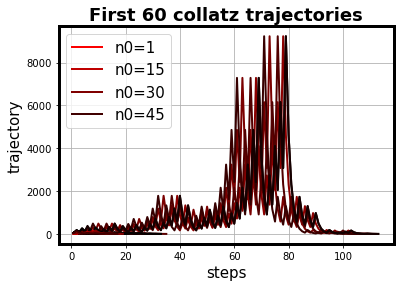

In [38]:
#This shows the collatz trajectory for a number n0
nm=0 #maximum value of starting point
traj=nm #trajectories for numbers from 1 to traj
x0=[]
y=[] #list of collatz trajectories
nstart=[]
nsteps=[] #number of steps
for j in range(traj):
    xs=[]
    n0=j+1 #randomly choosing starting point
    xs.append(0)
    xs=[i1+1 for i1 in range(len(collatz(n0)))]
    c2=[1, 1-n0/nm, n0/nm] #new color 2
    y.append(collatz(n0))
    x0.append(xs)
    nstart.append(n0)
    nsteps.append(len(collatz(n0)))
    


for k in range(len(y)):
    c2=[1-nstart[k]/traj, 0, 0] #random colors
    plt.plot(x0[k],y[k],color=c2,linewidth=2)
    
#For legends
n0=1
n1=int(nm/4)
n2=2*n1
n3=3*n1
c2=[1-nstart[n0-1]/traj, 0, 0] #random colors
fig0,=plt.plot(x0[n0-1],y[n0-1],color=c2,linewidth=2)

c2=[1-nstart[n1-1]/traj, 0, 0] #random colors
fig1,=plt.plot(x0[n1-1],y[n1-1],color=c2,linewidth=2)

c2=[1-nstart[n2-1]/traj, 0, 0] #random colors
fig2,=plt.plot(x0[n2-1],y[n2-1],color=c2,linewidth=2)

c2=[1-nstart[n3-1]/traj, 0, 0] #random colors
fig3,=plt.plot(x0[n3-1],y[n3-1],color=c2,linewidth=2)

plt.xlabel("steps")
plt.title("First "+str(nm)+" collatz trajectories",fontsize=18, fontweight='bold')
plt.ylabel("trajectory",fontsize=15)
plt.legend([fig0,fig1,fig2,fig3],['n0='+str(n0), 'n0='+str(n1),'n0='+str(n2),'n0='+str(n3)], loc='upper left',fontsize=15)
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.xlabel("steps",fontsize=15)
plt.grid()

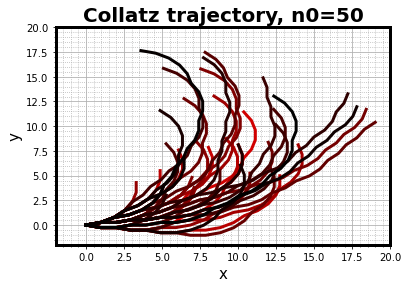

In [6]:
#This expresses the trajectory as : Starting from n0 which corresponds to point (0,0) if the number in the next step is
#even then we move the add (cos(d\theta),sin(d\theta)) else we move the point to (cos(-d\theta),sin(-dtheta)) 
#iterate the process till the number hits 1
dtheta=15*np.pi/180
xt=[]
yt=[]
xtree=[] #for tree trajectory
ytree=[] #for tree trajectory
NP=25 #maximum steps for trajectory plot, for some starting n0 the trajectory can be very large. Since the purpose 
#here is to show the general randomness of the trjaectory so we take finite number of steps
for j in range(len(y)):
    xt.append([])
    yt.append([])
    xtree.append([])
    ytree.append([])
    theta=0
    for i in range(len(y[j])):
        if i==0:
            theta=0
            xt[j].append(0)
            yt[j].append(0)
            xtree[j].append(0)
            ytree[j].append(0)
        elif i>0:
            if y[j][i]%2==0:
                theta=theta+dtheta
                xt[j].append(xt[j][i-1]+np.cos(theta))
                yt[j].append(yt[j][i-1]+np.sin(theta))
                xtree[j].append(xtree[j][i-1]+np.sign(np.random.rand()-0.5)/(np.sqrt(2)))
                ytree[j].append(ytree[j][i-1]+1/(np.sqrt(2)))
            else:
                theta=theta-dtheta
                xt[j].append(xt[j][i-1]+np.cos(theta))
                yt[j].append(yt[j][i-1]+np.sin(theta))
                xtree[j].append(xtree[j][i-1])
                ytree[j].append(ytree[j][i-1]+1)
fname=[] #defining empty filename list for animation
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle = ':')
for k in range(len(y)):
    nt=min(NP-1,len(xt[k])-1)
    c2=[1-nstart[k]/traj, 0, 0] #defining colors based on n0
    plt.plot(xt[k][0:nt],yt[k][0:nt],color=c2,linewidth=3)
    plt.xlabel("x",fontsize=15)
    plt.title("Collatz trajectory, n0="+str(k+1),fontsize=20, fontweight='bold')
    plt.ylabel("y",fontsize=15)
    ax = plt.gca()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)
    plt.xlim([-2,20])
    plt.ylim([-2,20])
    plt.savefig(str(k+1)+'.png')
    fname.append(str(k+1)+'.png')
with imageio.get_writer('collatz.gif', mode='I') as writer: #saving gif file
    for filename in fname:
        image = imageio.imread(filename)
        writer.append_data(image)
            

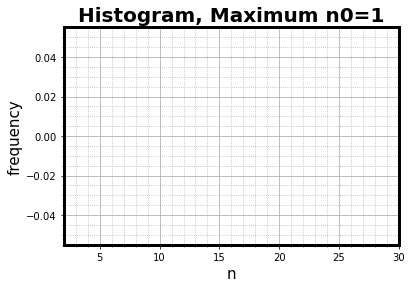

n0=1


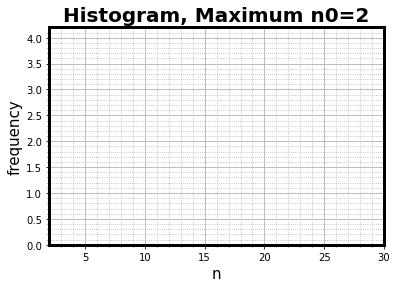

n0=2


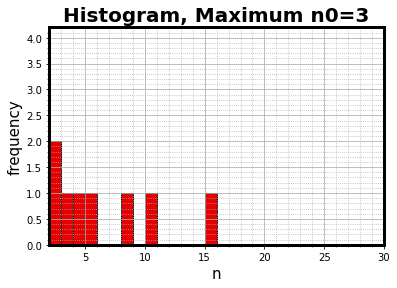

n0=3


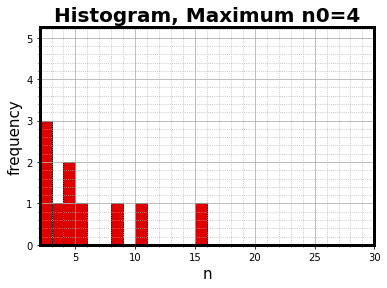

n0=4


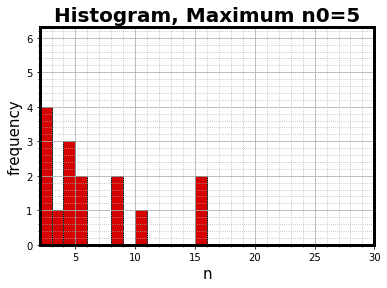

n0=5


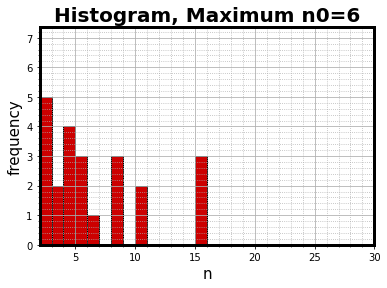

n0=6


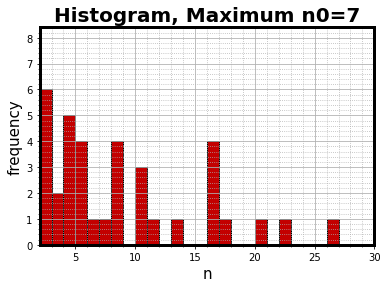

n0=7


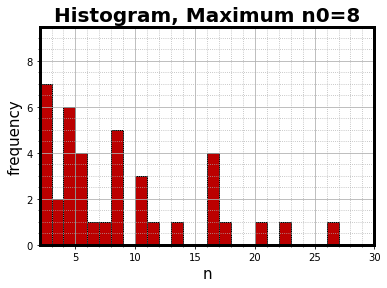

n0=8


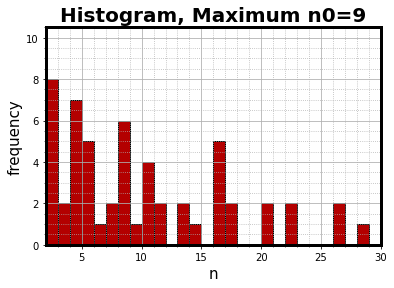

n0=9


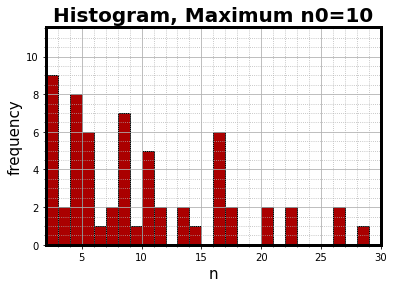

n0=10


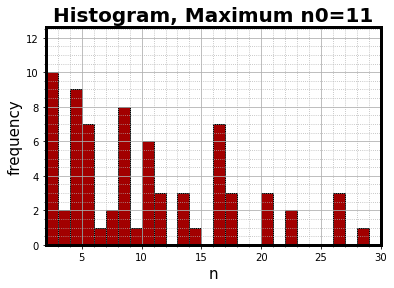

n0=11


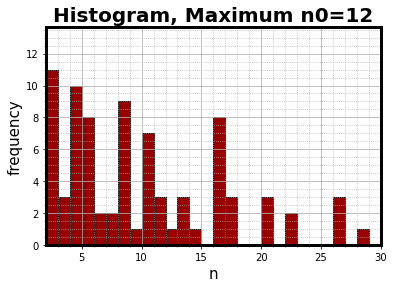

n0=12


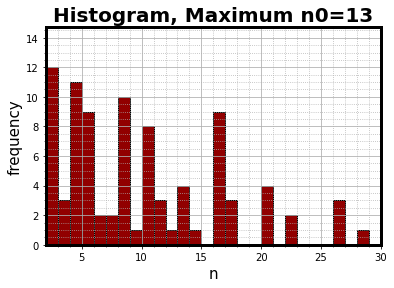

n0=13


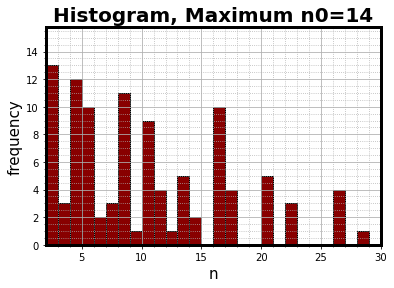

n0=14


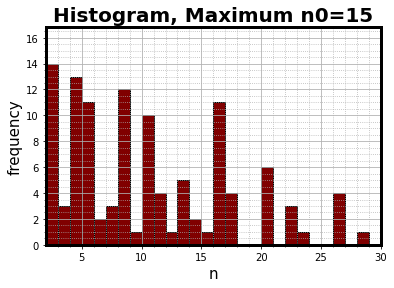

n0=15


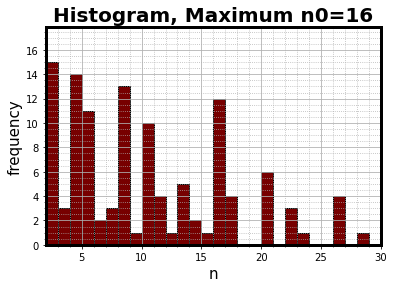

n0=16


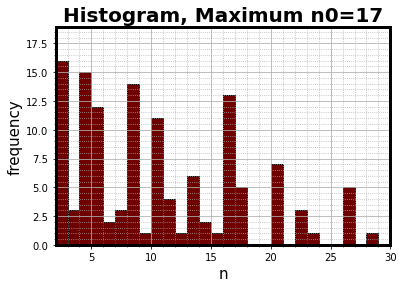

n0=17


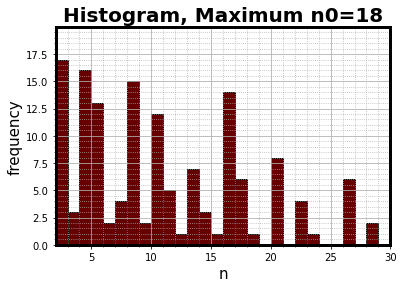

n0=18


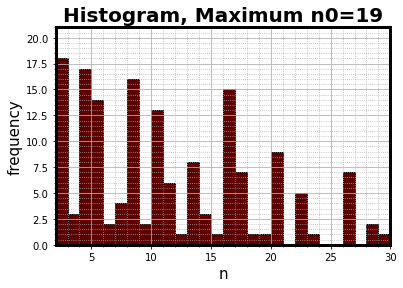

n0=19


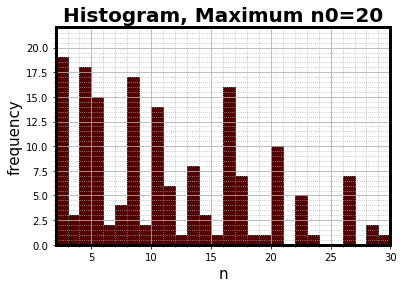

n0=20


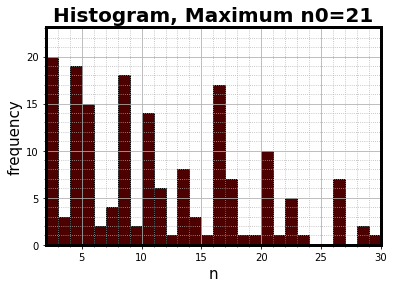

n0=21


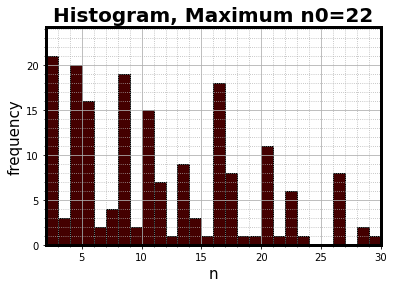

n0=22


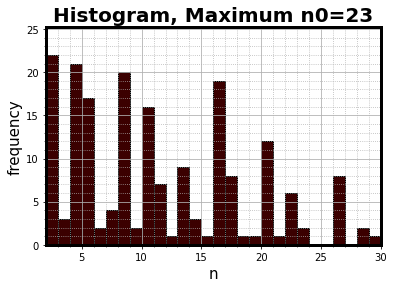

n0=23


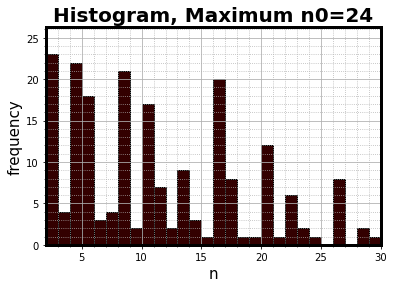

n0=24


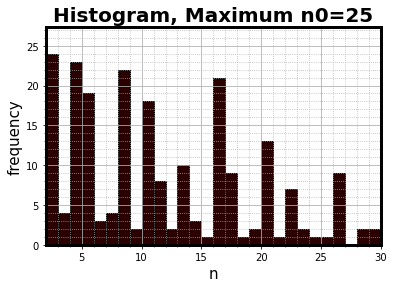

n0=25


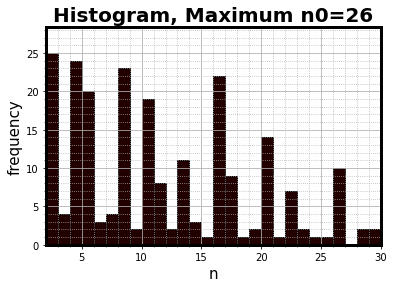

n0=26


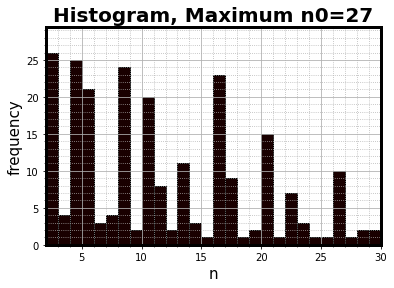

n0=27


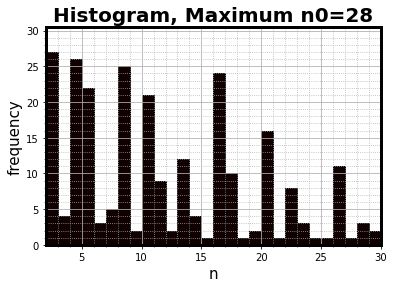

n0=28


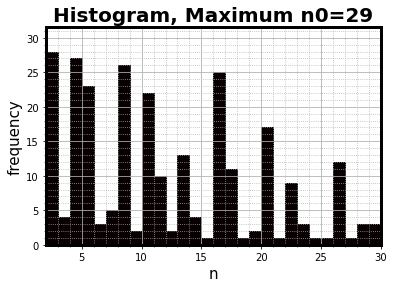

n0=29


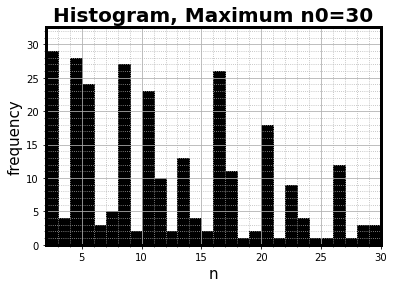

n0=30


In [12]:
#This code figures out the distribution of numbers accessed by the trajectory as n0 increases
NM=30 #maximum value of n0 analyzed
nhist=[] #list for the histogram plot
fname=[] #defining empty filename list for animation
binwidth=1 #width of histogram
#plt.minorticks_on()
#plt.grid(which='major')
#plt.grid(which='minor', linestyle = ':')
for i in range(NM):
    n0=i+1
    nhist=nhist+collatz(n0)
    c2=[1-n0/NM, 0, 0] #random colors
    plt.hist(nhist,bins=range(min(nhist), max(nhist) + binwidth, binwidth),facecolor=c2,edgecolor='k',linewidth=1)
    plt.xlabel("n",fontsize=15)
    plt.title("Histogram, Maximum n0="+str(n0),fontsize=20, fontweight='bold')
    plt.ylabel("frequency",fontsize=15)
    ax = plt.gca()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)
    plt.xlim([2,NM])
    #plt.ylim([0,NM])
    #plt.show()
    plt.minorticks_on()
    plt.grid(which='major')
    plt.grid(which='minor', linestyle = ':')
    plt.savefig(str(n0)+'.png')
    fname.append(str(n0)+'.png')
    plt.show()
    print("n0="+str(n0))
with imageio.get_writer('collatz_histogram.gif', mode='I') as writer: #saving gif file
    for filename in fname:
        image = imageio.imread(filename)
        writer.append_data(image) 
    
    

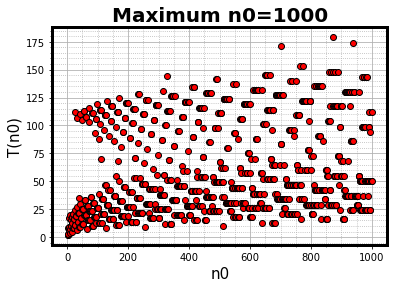

In [13]:
#This code figures out the steps taken to reach one for a number starting from n0
NM=1000 #maximum value of n0 analyzed
nstart=[] #list of n0
nsteps=[] #list of step values


for i in range(NM):
    n0=i+1
    nstart.append(n0)
    nsteps.append(len(collatz(n0)))
    
plt.plot(nstart, nsteps,'ko', markersize=6, markerfacecolor='red')
plt.xlabel("n0", fontsize=15)
plt.ylabel("T(n0)", fontsize=15)
plt.title("Maximum n0="+str(NM), fontsize=20, fontweight='bold')
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle = ':')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)